In [270]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

#### Analoge Trägheitsradiusmessung

In [289]:
#Gemessene Daten

#Gemessene Höhe des Pendels in mm
Hn = [65.5,59.8,57.8,54.,48.5,45.7,42.5,40.0,38.1,36.0,36.2,31.9,30.5,29.2,27.8,26.4,26.0]
Hn = np.array(Hn)*10.0

#Dauer einer Periode in s
Tn = [10.06,9.33,9.3,8.90,8.29,7.73,7.60,7.22,7.23,6.54,6.46,6.08,6.13,5.83,4.93,5.6,4.2]
Tn = np.array(Tn)
TnSquared = Tn**2

In [290]:
import scipy as sp
#Linear Regression
(a,b) = sp.polyfit(TnSquared,Hn,1)   #Regression Fit

print("a: "+str(round(a,2)))
print("b: "+str(round(b,0)))


Ressvalues = sp.polyval([a,b],TnSquared)


a: 5.14
b: 134.0


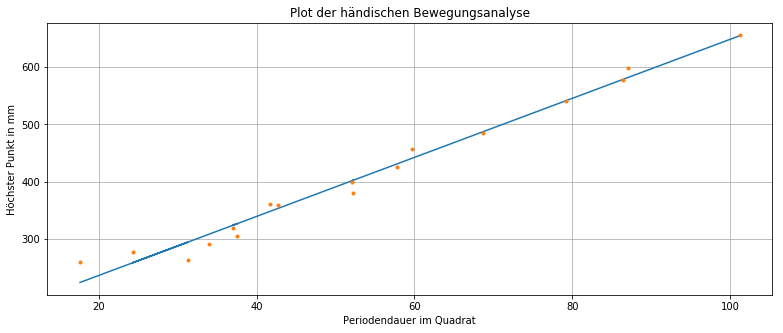

In [291]:
fig = plt.figure(figsize = (13,5))
plt.title("Plot der händischen Bewegungsanalyse")
plt.ylabel("Höchster Punkt in mm")
plt.xlabel("Periodendauer im Quadrat")
plt.grid(True)

plt.plot(TnSquared,Ressvalues)
plt.plot(TnSquared,Hn,".")

Fehler der Steigung ist gegeben als die Standartabweichung des Abstands der Linearisierten Werte von den gemessenen Werten.

In [273]:
da = np.std(np.abs(Ressvalues-Hn))
print("Fehler der Steigung beträgt: "+str(da))

Fehler der Steigung beträgt: 10.592158917825778


In [274]:
#abstrakte Größe y
g = 9.81*1000#g in mm
y = g/(8*a)
print(y)


238.47191429072146


Maße des Maxwell Pendels analog zur Skizze im Protokoll. Alle Angaben in mm.

In [275]:
L = [321,126,13,4]
R = [4,6,10,68,91]

Experimenteller Trägheitsradius. Folgt der im skript hergeleiteten Formel: 

\begin{align}
R_J = r\sqrt{\frac{gT_n^2}{8h_n}-1} = r\sqrt{y-1}
\end{align}

Radius r der Spule entspricht Durchschnitt von auf und abgewickelt.

In [276]:
r = (R[0]+R[1])/2.0 
Rj_exp = r*np.sqrt(y-1.0)

Gaußfehler des experiementellen Trägheitsradius

In [277]:
dRdr = np.sqrt(y-1.0)
dRda = (-r*g)/(16*a**2*np.sqrt(y-1))

dr = 0.3

print("dR/dr: "+str(dRdr))
print("dR/da: "+str(dRda))

Error = np.sqrt(dr*abs(dRdr)+da*abs(dRda))
print("Der experiemntell Trägheitsradius beträgt: "+str(round(Rj_exp,0))+" +/- "+str(round(da,-1))+" mm.")

dR/dr: 15.41012375974708
dR/da: -7.523663055268246
Der experiemntell Trägheitsradius beträgt: 77.0 +/- 10.0 mm.


#### Theoretischer Trägheitsradius

In [278]:
def Inertia(L,R):
    Zähler = L[0]*(R[0]**4)+L[1]*(R[1]**4-R[0]**4)+L[2]*(R[2]**4-R[1]**4)
    Zähler += L[2]*(R[4]**4-R[3]**4)+L[3]*(R[3]**4-R[2]**4)
    Nenner = L[0]*(R[0]**2)+L[1]*(R[1]**2-R[0]**2)+L[2]*(R[2]**2-R[1]**2)
    Nenner += L[2]*(R[4]**2-R[3]**2)+L[3]*(R[3]**2-R[2]**2)
    return np.sqrt(Zähler/(2*Nenner))
Rj_th = Inertia(L,R)

Fehlerberechung mittels numerischer Linearisierung. Da min/max Methode nicht offensichtlich und explizite differentiation extrem aufwendig wird nun genutzt, dass für jede Variable v von der R abhängig ist gilt:

\begin{align}
\frac{dRj}{dv} ≈ \frac{R(v+0.001)-R(v)}{0.001}
\end{align}

Diese angenäherte Steigung wird für jede gemessene Länge und Radius berechnet. Der Fehler wird dann mittels nach Gauß folgendermaßen angenähert.

\begin{align}
\sqrt{\sum_{i} \frac{dR}{dv_i}} ≈ \sqrt{\sum_{i}\frac{R(v_i+0.001)-R(v_i)}{0.001}}
\end{align}

In [279]:
dLdLi = [0,0,0,0]  #Liste aller partiellem Ableitungen von L

for i in range(len(L)):
    
    L_ = L[:]
    L_[i] += 0.001
    Rj_th_ = Inertia(L_,R)
    dLdLi[i] = (Rj_th_-Rj_th)/0.001
    
dLdLi = np.array(dLdLi)
[print("dL/dL"+str(i)+": "+str(dLdLi[i])) for i in range(len(L))]

dL/dL0: -0.007399993094736601
dL/dL1: -0.009214634900445162
dL/dL2: 0.5939850727685325
dL/dL3: -1.0463902483195398


[None, None, None, None]

In [280]:
dRdRi = [0,0,0,0,0]  #Liste aller partiellem Ableitungen von R

for i in range(len(R)):
    R_ = R[:]
    R_[i] += 0.001
    Rj_th_ = Inertia(L,R_)
    dRdRi[i] = (Rj_th_-Rj_th)/0.001
    
dRdRi = np.array(dRdRi)
[print("dL/dR"+str(i)+": "+str(dRdRi[i])) for i in range(len(R))]

dL/dR0: -0.7203518028831013
dL/dR1: -0.6234632018191633
dL/dR2: -0.08162730927097073
dL/dR3: 0.011198638276255224
dL/dR4: 0.8281026248937451


[None, None, None, None, None]

In [281]:
dL = np.array([4.0,2.0,0.05,1.0])    #Messfehler L
dR = np.array([0.3,0.3,0.3,0.5,1])   #Messfehler R

ErL = dL*dLdLi #Fehler von L ist Ableitung mal Messfeheler
ErR = dR*dRdRi #Fehler von R ist Ableitung mal Messfeheler 

Gesamtfehler = np.concatenate([ErL.T,ErR.T]) #Gesamtfehler ist Kombination der Einzelfehler

Gausserror = np.linalg.norm(Gesamtfehler)
print("Das theoretische Drehmoment beträgt:"+str(round(Rj_th,0))+" +/- "+str(np.ceil(Gausserror)))

Das theoretische Drehmoment beträgt:69.0 +/- 2.0


#### Computergestützte Höhenmessung

In [285]:
def eval_Rj(r,a):
    y = g/(8*a)
    return r*np.sqrt(y_-1.0)


a_ = 0.006*1000  #Steigung von gnuplot in m/s^2 wird nun in mm/s^2 angegeben
y_ = g/(8*a_)

Rj_comp = eval_Rj(r,a_)

Fehlerberechnung mittels min/max Methode

In [283]:
da_ = 6*10**(-5)

Rj_comp_min = eval_Rj(r-dr,a-da_)
Rj_comp_max = eval_Rj(r+dr,a+da_)

print("Rj_comp_min-Rj_comp: "+str(round(Rj_comp_min-Rj_comp,6)))
print("Rj_comp_max-Rj_comp: "+str(round(Rj_comp_max-Rj_comp,6)))


Rj_comp_min-Rj_comp: -4.278288
Rj_comp_max-Rj_comp: 4.278288


Da Abweichungen in beide Richtungen gleich groß sind gilt:

In [284]:
dRj_comp = (Rj_comp_max-Rj_comp_min)/2
print("Digital gemessener Trägheitsradius beträgt: "+str(round(Rj_comp,0))+" +/- "+str(np.ceil(dRj_comp)))

Digital gemessener Trägheitsradius beträgt: 71.0 +/- 5.0


In [292]:
t1 = 60+14.105
t2 = 60+13.78
t3 = 60+14.6

print((t1+t2+t3)/3.0)

74.16166666666666
